In [1]:
import pandas as pd
from roberta.detector import SpamMessageDetector

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Accuracy: 0.9961
Precision: 0.9980
Recall: 0.9980
F1 Score: 0.9980
ROC AUC: 0.9953


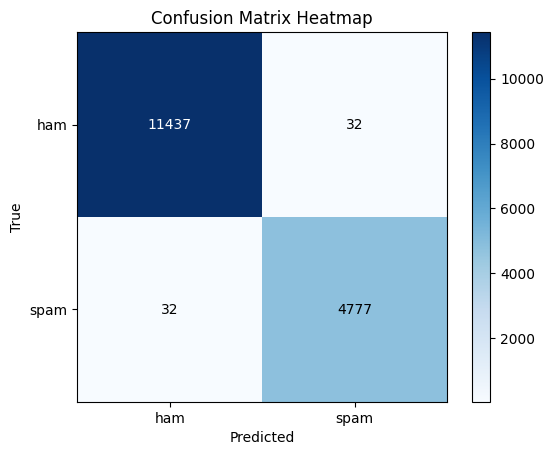

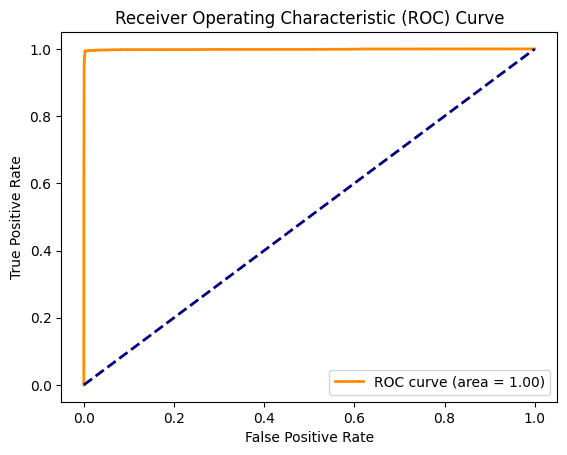

In [2]:
spam_detector = SpamMessageDetector("mshenoda/roberta-spam")
spam_detector.evaluate("../data/raw/train_spam.csv")

In [6]:
test_df = pd.read_csv('../data/raw/test_spam.csv', index_col=False)
test_df

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...
...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...
4066,baylor enron case study cindy yes i shall co a...
4067,boring as compared to tp
4068,hellogorgeous hows u my fone was on charge lst...


In [8]:
test_emails = test_df['text']

accuracy = []
for text in test_emails:
    detection, acc = spam_detector.detect(text)
    accuracy.append(acc)


output = pd.DataFrame({'text': test_emails, 'detection': accuracy})

output

,text,detection
0,j jim whitehead ejw cse ucsc edu writes j you ...,0.000002
1,original message from bitbitch magnesium net p...,0.000002
2,java for managers vince durasoft who just taug...,0.000002
3,there is a youtuber name saiman says,0.000002
4,underpriced issue with high return on equity t...,0.999998
...,...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...,0.000002
4066,baylor enron case study cindy yes i shall co a...,0.000002
4067,boring as compared to tp,0.000002
4068,hellogorgeous hows u my fone was on charge lst...,0.000002


In [11]:
output.to_csv('../data/result/Roberta_predictions.csv', index=False)

print("Predictions saved to 'Roberta_predictions.csv'")

Predictions saved to 'Roberta_predictions.csv'
